In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C


In [ ]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [ ]:
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_21740\286566303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [ ]:
df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')

In [ ]:
df['AgeBand'] = pd.cut(df['Age'], bins=[0, 16, 32, 48, 64, 80], labels=['Child', 'Young Adult', 'Adult', 'Middle-aged', 'Senior'])
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [ ]:
df['Pclass_Age'] = df['Pclass'].astype(str) + '_' + df['AgeBand'].astype(str)
df['Pclass_Fare'] = df['Pclass'].astype(str) + '_' + df['FareBand'].astype(str)

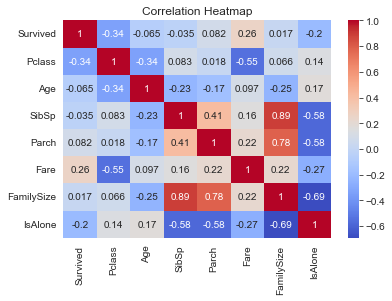

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeBand,FareBand,Pclass_Age,Pclass_Fare
0,0,3,male,22.0,1,0,7.2500,U,S,2,0,Young Adult,Low,3_Young Adult,3_Low
1,1,1,female,38.0,1,0,71.2833,C,C,2,0,Adult,Very High,1_Adult,1_Very High
2,1,3,female,26.0,0,0,7.9250,U,S,1,1,Young Adult,Medium,3_Young Adult,3_Medium
3,1,1,female,35.0,1,0,53.1000,C,S,2,0,Adult,Very High,1_Adult,1_Very High
4,0,3,male,35.0,0,0,8.0500,U,S,1,1,Adult,Medium,3_Adult,3_Medium
5,0,3,male,28.0,0,0,8.4583,U,Q,1,1,Young Adult,Medium,3_Young Adult,3_Medium
6,0,1,male,54.0,0,0,51.8625,E,S,1,1,Middle-aged,Very High,1_Middle-aged,1_Very High
7,0,3,male,2.0,3,1,21.0750,U,S,5,0,Child,High,3_Child,3_High
8,1,3,female,27.0,0,2,11.1333,U,S,3,0,Young Adult,Medium,3_Young Adult,3_Medium
9,1,2,female,14.0,1,0,30.0708,U,C,2,0,Child,High,2_Child,2_High


In [ ]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeBand,FareBand,Pclass_Age,Pclass_Fare
331,1,male,1.240235,0,0,-0.074583,C,S,1,1,Adult,High,1_Adult,1_High
733,2,male,-0.488887,0,0,-0.386671,U,S,1,1,Young Adult,Medium,2_Young Adult,2_Medium
382,3,male,0.202762,0,0,-0.488854,U,S,1,1,Young Adult,Medium,3_Young Adult,3_Medium
704,3,male,-0.258337,1,0,-0.490280,U,S,2,0,Young Adult,Low,3_Young Adult,3_Low
813,3,female,-1.795334,4,2,-0.018709,U,S,7,0,Child,Very High,3_Child,3_Very High


In [ ]:
y_train.sample(5)

801    1
639    0
430    1
241    1
567    0
Name: Survived, dtype: int64

In [ ]:
column_list = list(df.columns)
print(column_list)


['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone', 'AgeBand', 'FareBand', 'Pclass_Age', 'Pclass_Fare']


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeBand,FareBand,Pclass_Age,Pclass_Fare
0,0,3,male,-0.565736,1,0,-0.502445,U,S,2,0,Young Adult,Low,3_Young Adult,3_Low
1,1,1,female,0.663861,1,0,0.786845,C,C,2,0,Adult,Very High,1_Adult,1_Very High
2,1,3,female,-0.258337,0,0,-0.488854,U,S,1,1,Young Adult,Medium,3_Young Adult,3_Medium
3,1,1,female,0.433312,1,0,0.420730,C,S,2,0,Adult,Very High,1_Adult,1_Very High
4,0,3,male,0.433312,0,0,-0.486337,U,S,1,1,Adult,Medium,3_Adult,3_Medium


In [ ]:
trf1 = ColumnTransformer(remainder='passthrough', transformers=[
    ('impute_age', SimpleImputer(), [2]),  # Assuming 'Age' is the 3rd column
    ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6])  # Assuming 'Embarked' is the 7th column
])


In [ ]:
trf2 = ColumnTransformer(remainder='passthrough', transformers=[
    ('ohe_sex_embarked', OneHotEncoder(handle_unknown='ignore', sparse=False), [1, 6])  # 'Sex' and 'Embarked'
])


In [ ]:
trf3 = ColumnTransformer(transformers=[
    ('scale', MinMaxScaler(), slice(0, 10))  # Scale features 0 to 9
])

In [ ]:
trf4 = SelectKBest(score_func=chi2, k=8)

In [ ]:
model=RandomForestClassifier()

In [ ]:
pipeline = Pipeline(steps=[
    ('transformer1', trf1),
    ('transformer2', trf2),
    ('transformer3', trf3),
    ('transformer4', trf4),
    ('classifier', model)
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('transformer2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('transformer3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('transformer4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x0000027911927820>)),
                ('classifier', RandomForestClassifier())])

In [ ]:
pipeline.named_steps

{'transformer1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'transformer2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'transformer3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'transformer4': SelectKBest(k=8, score_func=<function chi2 at 0x0000027911927820>),
 'classifier': RandomForestClassifier()}

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
# Predict
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6927374301675978

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()

0.6924554318920516

In [ ]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import GridSearchCV
def objective(trial):
    n_estimators = trial.suggest_int('classifier__n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('classifier__max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_int('classifier__min_samples_split', 2, 16, step=2)
    min_samples_leaf = trial.suggest_int('classifier__min_samples_leaf', 1, 16, step=1)

    pipeline.set_params(classifier__n_estimators=n_estimators,
                        classifier__max_depth=max_depth,
                        classifier__min_samples_split=min_samples_split,
                        classifier__min_samples_leaf=min_samples_leaf)

    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=100, n_jobs=-1)

print("Best hyperparameters found: ", study.best_params)

[I 2024-08-08 14:02:31,882] A new study created in memory with name: no-name-5430223a-effa-4e60-9502-24656c5768f9
[I 2024-08-08 14:03:00,190] Trial 7 finished with value: 0.6544863587117108 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 10, 'classifier__min_samples_split': 6, 'classifier__min_samples_leaf': 15}. Best is trial 7 with value: 0.6544863587117108.
[I 2024-08-08 14:03:00,201] Trial 0 finished with value: 0.6460553530976066 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 20, 'classifier__min_samples_split': 12, 'classifier__min_samples_leaf': 16}. Best is trial 7 with value: 0.6544863587117108.
[I 2024-08-08 14:03:00,217] Trial 3 finished with value: 0.6432581503004038 and parameters: {'classifier__n_estimators': 800, 'classifier__max_depth': 4, 'classifier__min_samples_split': 16, 'classifier__min_samples_leaf': 6}. Best is trial 7 with value: 0.6544863587117108.
[I 2024-08-08 14:03:00,307] Trial 1 finished with value: 0

Best hyperparameters found:  {'classifier__n_estimators': 100, 'classifier__max_depth': 16, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1}


In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.69


In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid.fit(X_train, y_train)

print("Best parameters found: ", grid.best_params_)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Accuracy: 0.69


In [ ]:
grid.best_score_

0.6952723333005023

In [ ]:
grid.best_params_

{'classifier__bootstrap': True,
 'classifier__max_depth': None,
 'classifier__max_features': 'auto',
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 300}

In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.69


In [ ]:
# export
import pickle
pickle.dump(pipeline,open('random classifier using pipeline.pkl','wb'))